# Aim: To Run Lasso Regression on the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [4]:
import sys
import os
import math
import csv
import json

## Helper Methods and Variables

In [5]:
def sentence_to_snake_case(sentence):
    # Split the sentence into words, convert to lowercase, and join with underscores
    snake_case = '_'.join(word.lower() for word in sentence.split())
    return snake_case

In [6]:
useless_cols = ['CustomerID', 'Count', 'Country', 'State', 'City', \
                'Zip Code', 'Lat Long', 'Churn Score', 'Churn Label', 'CLTV', 'Churn Reason']

In [7]:
y_col = ["Churn Value"]

## Prepare the Data

In [8]:
os.getcwd()

'C:\\D Drive\\University of Washington\\Study\\Quarter 2\\DATA 557\\Project\\ML'

In [9]:
data = pd.read_csv('../data/Telco_customer_churn_cleaned.csv')

In [10]:
data.head()

,Unnamed: 0,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [11]:
data.head()

,Unnamed: 0,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [12]:
data.shape

(7043, 34)

In [13]:
data = data.rename(columns = lambda column: sentence_to_snake_case(column))

In [14]:
data.head()

,unnamed:_0,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,...,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
0,0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [15]:
# Leaving in Customer ID just in case
useless_cols = [sentence_to_snake_case(column) for column in useless_cols]

In [16]:
y_col = [sentence_to_snake_case(column) for column in y_col]

In [17]:
y_col

['churn_value']

In [18]:
# Drop the first column "Unnamed" and the useless columns
data = data.drop([data.columns[0]] + useless_cols, axis=1)

In [19]:
data.head()

,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value
0,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


## Divide the dataset into train and test test

In [20]:
RNG = np.random.RandomState(seed=420)

In [21]:
train, test = train_test_split(data, test_size=0.1, shuffle=True, random_state=RNG)

In [22]:
train.shape

(6338, 22)

In [23]:
test.shape

(705, 22)

## Pre-process the data

### Normalize

**Remember to save normalization details of train data, to apply to test data**

Pipeline transforms automatically do so for us.

In [352]:
dtypes = data.dtypes

In [353]:
# Prepare to Standardize all numeric columns except Churn Value
numeric_cols = list(data.select_dtypes(include=['int64', 'float64']))
numeric_cols = [column for column in numeric_cols if column not in y_col]
numeric_cols

['latitude', 'longitude', 'tenure_months', 'monthly_charges', 'total_charges']

In [354]:
# Pipeline is to maintain consistency
standardization_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [355]:
# ColumnTransformer helps standardize only selected columns
preprocessor = ColumnTransformer(
    transformers=[('num', standardization_transformer, numeric_cols)],
    remainder='passthrough'  # This leaves the rest of the columns in the dataset unchanged
)

In [356]:
preprocessed_train_array = preprocessor.fit(train).transform(train)

In [357]:
# train

Convert the preprocessed arrays into pandas dataframe, by taking into account the correct column names, and the correct column types.

In [358]:
preprocessed_columns = [col.split('__')[1] for col in preprocessor.get_feature_names_out()]
# preprocessed_columns

## Warning!! Bad Coding Practice Alert

In [359]:
# Instead of mapping preprocessed_columns with the old data.columns and getting the dtypes
# for now we will proceed with hard-coding logic
# Because columns that have prefix num are obviously float
# While other columns are either object or can be treated as object (except Churn Value which will separately be made int64)
preprocessed_column_types = ['float64' if col.split('__')[0]=='num' else 'object' for col in preprocessor.get_feature_names_out()]

In [360]:
preprocessed_column_types[-1] = 'int64'

In [361]:
preprocessed_column_dtypes = {preprocessed_columns[i]: preprocessed_column_types[i] for i in range(len(preprocessed_columns))}

In [362]:
preprocessed_train = pd.DataFrame(data=preprocessed_train_array, columns=preprocessed_columns)
preprocessed_train = preprocessed_train.astype(preprocessed_column_dtypes)

In [363]:
preprocessed_train.head()

,latitude,longitude,tenure_months,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value
0,-0.498158,-0.371946,1.125328,1.295086,1.621985,Male,No,Yes,Yes,Yes,...,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0
1,-1.423199,1.358143,-0.501284,-1.516232,-0.813905,Female,No,No,No,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),0
2,0.444907,-1.026476,-0.623280,0.965322,-0.289477,Male,No,No,No,Yes,...,Yes,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,1
3,1.202459,-0.117674,-0.135296,-1.514566,-0.760886,Female,No,No,No,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4,-0.899465,0.660012,0.678010,0.653879,0.714169,Female,No,No,No,Yes,...,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0


In [364]:
# preprocessed_train.dtypes

In [365]:
preprocessed_test_array = preprocessor.transform(test)

In [366]:
preprocessed_test = pd.DataFrame(data=preprocessed_test_array, columns=preprocessed_columns)
preprocessed_test = preprocessed_test.astype(preprocessed_column_dtypes)

In [367]:
preprocessed_test.head()

,latitude,longitude,tenure_months,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value
0,1.077896,-1.383298,1.206658,1.331726,1.772881,Female,Yes,Yes,No,Yes,...,Yes,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,0
1,-0.903949,0.703809,0.596679,-1.479591,-0.589838,Male,No,No,No,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
2,-0.863037,0.738054,-0.948603,-0.165534,-0.766100,Male,No,No,No,Yes,...,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,0
3,0.495985,-1.031974,-0.013301,0.868725,0.270326,Female,Yes,No,No,Yes,...,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,0
4,0.898898,-0.799467,-1.151929,0.184215,-0.881114,Female,No,No,No,Yes,...,No,No,No,No,No,No,Month-to-month,No,Electronic check,1


In [368]:
# preprocessed_test.dtypes

### Split Datasets into X and y

(Not useful if using statsmodels api)

In [369]:
X_columns = list(preprocessed_train.columns)

In [370]:
X_columns = [column for column in X_columns if column not in y_col]

In [371]:
# X_columns

In [372]:
X_train, y_train = preprocessed_train[X_columns], preprocessed_train[y_col]

In [373]:
X_test, y_test = preprocessed_test[X_columns], preprocessed_test[y_col]

### Dimensionality Reduction?

Maybe later. Not relevant to Lasso Regression

## Run Lasso Logistic Regression

In [374]:
# preprocessed_column_types

In [375]:
# preprocessed_train_array

In [376]:
# preprocessed_train.dtypes

In [377]:
preprocessed_train.columns

Index(['latitude', 'longitude', 'tenure_months', 'monthly_charges',
       'total_charges', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'churn_value'],
      dtype='object')

In [378]:
def formulaGenerator(data, y_col = ['']):
    x_cols = [column for column in list(data.columns) if column not in y_col]
    formula = f'{y_col[0]} ~'
    for index, column in enumerate(x_cols):
        if index != 0: formula = f'{formula} +'
        if data.dtypes[column] in ['int64', 'float64']: formula = f'{formula} {column}'
        else: formula = f'{formula} C({column})'
    return formula

In [381]:
formula = formulaGenerator(preprocessed_train, y_col)
formula

'churn_value ~ latitude + longitude + tenure_months + monthly_charges + total_charges + C(gender) + C(senior_citizen) + C(partner) + C(dependents) + C(phone_service) + C(multiple_lines) + C(internet_service) + C(online_security) + C(online_backup) + C(device_protection) + C(tech_support) + C(streaming_tv) + C(streaming_movies) + C(contract) + C(paperless_billing) + C(payment_method)'

In [406]:
model = smf.logit(formula = formula, data = preprocessed_train)
# results = model.fit_regularized(method='l1', alpha=10, QC_verbose=False)

In [418]:
# results.summary()

In [479]:
param_grid = {'alpha': np.logspace(-5, 3, 10)}

In [480]:
param_list = list(ParameterGrid(param_grid))

In [481]:
param_list

[{'alpha': 1e-05},
 {'alpha': 7.742636826811278e-05},
 {'alpha': 0.0005994842503189409},
 {'alpha': 0.004641588833612777},
 {'alpha': 0.03593813663804626},
 {'alpha': 0.2782559402207126},
 {'alpha': 2.154434690031882},
 {'alpha': 16.681005372000556},
 {'alpha': 129.15496650148827},
 {'alpha': 1000.0}]

In [504]:
coefficients = None

In [505]:
for params in param_list:
    # Fit the model with the given parameters
    try:
        results = model.fit_regularized(method='l1', QC_verbose=False, **params)
    except:
        print(params)
    
    # Store the coefficients
    row = pd.DataFrame(results.params).transpose()
    row = pd.concat([row, pd.DataFrame.from_dict({'regularization': [params['alpha']]})], axis=1)
    if coefficients is None: 
        coefficients = row
    else: 
        coefficients = pd.concat([coefficients, row], ignore_index=True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.39888452593551926
            Iterations: 160
            Function evaluations: 161
            Gradient evaluations: 160


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 32 out of 33 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.39888497899903125
            Iterations: 161
            Function evaluations: 161
            Gradient evaluations: 161


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 23 out of 33 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.39888844198564705
            Iterations: 161
            Function evaluations: 162
            Gradient evaluations: 161


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 24 out of 33 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3988979227308406
            Iterations: 327
            Function evaluations: 327
            Gradient evaluations: 327


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 11 out of 33 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.39897327954211337
            Iterations: 473
            Function evaluations: 473
            Gradient evaluations: 473


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 10 out of 33 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3994726908543385
            Iterations: 329
            Function evaluations: 329
            Gradient evaluations: 329


C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 3 out of 33 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\hnaid\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.40270307787397003
            Iterations: 181
            Function evaluations: 181
            Gradient evaluations: 181
{'alpha': 2.154434690031882}
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4228194369374018
            Iterations: 106
            Function evaluations: 106
            Gradient evaluations: 106
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5126442275529539
            Iterations: 63
            Function evaluations: 63
            Gradient evaluations: 63
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6810957254983847
            Iterations: 8
            Function evaluations: 8
            Gradient evaluations: 8


In [506]:
coefficients

,Intercept,C(gender)[T.Male],C(senior_citizen)[T.Yes],C(partner)[T.Yes],C(dependents)[T.Yes],C(phone_service)[T.Yes],C(multiple_lines)[T.No phone service],C(multiple_lines)[T.Yes],C(internet_service)[T.Fiber optic],C(internet_service)[T.No],...,C(paperless_billing)[T.Yes],C(payment_method)[T.Credit card (automatic)],C(payment_method)[T.Electronic check],C(payment_method)[T.Mailed check],latitude,longitude,tenure_months,monthly_charges,total_charges,regularization
0,-1.532137,-0.042548,0.121027,0.233722,-1.516276,-0.714543,-6.912556e-01,0.412923,1.476520,-0.221773,...,0.337039,-0.052405,0.362391,-0.050153,-0.069585,-0.069243,-1.568747,-9.720517e-01,8.243054e-01,0.000010
1,-1.530028,-0.042554,0.121047,0.233724,-1.516289,-0.715183,-6.903996e-01,0.412555,1.474686,-0.221510,...,0.337031,-0.052412,0.362387,-0.050155,-0.069589,-0.069248,-1.568742,-9.698446e-01,8.243028e-01,0.000077
2,-1.518520,-0.042605,0.121061,0.233751,-1.516371,-0.715307,-6.788854e-01,0.409708,1.460460,-0.219466,...,0.337034,-0.052464,0.362353,-0.050199,-0.069660,-0.069330,-1.568700,-9.527031e-01,8.242705e-01,0.000599
3,-1.461593,-0.042558,0.121015,0.233625,-1.516290,-0.785738,-7.634952e-01,0.413120,1.477834,-0.221938,...,0.336954,-0.052550,0.362307,-0.050182,-0.069523,-0.069178,-1.567754,-9.733694e-01,8.233295e-01,0.004642
4,-1.393737,-0.042748,0.120721,0.233554,-1.516265,-0.740597,-6.048521e-01,0.384660,1.336433,-0.201636,...,0.336985,-0.052150,0.362496,-0.049809,-0.069238,-0.068985,-1.565603,-8.029802e-01,8.212667e-01,0.035938
5,-0.936041,-0.043427,0.119222,0.232149,-1.515018,-0.665525,1.572580e-16,0.250083,0.671384,-0.105932,...,0.336505,-0.050044,0.363601,-0.047165,-0.066909,-0.067103,-1.546036,-1.342996e-16,8.015591e-01,0.278256
6,-0.936041,-0.043427,0.119222,0.232149,-1.515018,-0.665525,1.572580e-16,0.250083,0.671384,-0.105932,...,0.336505,-0.050044,0.363601,-0.047165,-0.066909,-0.067103,-1.546036,-1.342996e-16,8.015591e-01,2.154435
7,0.000000,0.000000,0.070090,0.033434,-1.278034,-0.955429,0.000000e+00,0.028802,0.013137,0.000000,...,0.221462,0.000000,0.341074,0.000000,0.000000,0.000000,-0.817346,9.145200e-01,9.701658e-17,16.681005
8,-0.494062,0.000000,0.000000,0.000000,-0.569859,-0.463635,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.041925,0.000000,0.000000,0.000000,-0.883312,6.955048e-01,0.000000e+00,129.154967
9,-0.312390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1000.000000


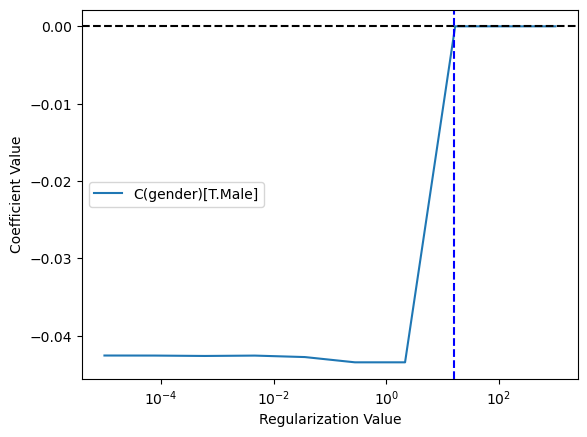

In [519]:
coefficients[['C(gender)[T.Male]', 'regularization']].plot(x='regularization', logx=True, xlabel='Regularization Value', ylabel='Coefficient Value', kind='line', legend=True)
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=16, color='blue', linestyle='--')
plt.show()

## Helper Methods for Logistic Regression, Cross-Validation